# Song Cohorts

## Problem Statement
As of September 2022, Spotify, a Swedish audio streaming and media service provider, have announced that it had over 456 million users, more than 195 million of which were paid subscribers. 

To maintain customer engagements, it would like to create cohorts of different songs to enhance their song recommendations, to better personalize each customer's own unique experience.

In [1]:
# import required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Preset presentation formatting
sns.set() # sets seaborn as the standard graphical style
np.set_printoptions(precision=3, suppress=True)

## Data Pre-Processing

In [3]:
# import the dataset
df = pd.read_csv("rolling_stones_spotify.zip", parse_dates=["release_date"])
df.head()

Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.0824         0.463   0.993          0.996000     0.932   -12.913   
1        0.4370         0.326   0.965          0.233000     0.961    -4.803   
2        0.4160         0.386   0.969          0.400000     0.956    -4.936   
3        0.5670         0.369   0.985          0.000107     0.895    -5.535   
4        0.4000         0.303   0.969          0.055900     0.966    -5.098   

   speechiness    tempo  valence  popularity  duration_ms  
0       0.1100  118.001   0.0302          33        48640  
1       0.0759  131.455   0.3180          34       253173  
2       0.1150  130.066   0.3130          34       263160  
3       0.1930  132.994   0.1470          32       305880  
4       0.0930  130.533   0.2060          32       305106

In [4]:
# General info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        1610 non-null   int64         
 1   name              1610 non-null   object        
 2   album             1610 non-null   object        
 3   release_date      1610 non-null   datetime64[ns]
 4   track_number      1610 non-null   int64         
 5   id                1610 non-null   object        
 6   uri               1610 non-null   object        
 7   acousticness      1610 non-null   float64       
 8   danceability      1610 non-null   float64       
 9   energy            1610 non-null   float64       
 10  instrumentalness  1610 non-null   float64       
 11  liveness          1610 non-null   float64       
 12  loudness          1610 non-null   float64       
 13  speechiness       1610 non-null   float64       
 14  tempo             1610 n

In [5]:
# drop unnecessary columns, i.e. row_num(0), uri(6)
df.drop(df.columns[[0,6]], axis=1, inplace=True)
df.head()

name               album release_date  track_number  \
0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10             1   
1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10             2   
2           Start Me Up - Live  Licked Live In NYC   2022-06-10             3   
3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10             4   
4            Don’t Stop - Live  Licked Live In NYC   2022-06-10             5   

                       id  acousticness  danceability  energy  \
0  2IEkywLJ4ykbhi1yRQvmsT        0.0824         0.463   0.993   
1  6GVgVJBKkGJoRfarYRvGTU        0.4370         0.326   0.965   
2  1Lu761pZ0dBTGpzxaQoZNW        0.4160         0.386   0.969   
3  1agTQzOTUnGNggyckEqiDH        0.5670         0.369   0.985   
4  7piGJR8YndQBQWVXv6KtQw        0.4000         0.303   0.969   

   instrumentalness  liveness  loudness  speechiness    tempo  valence  \
0          0.996000     0.932   -12.913       0.1100  118.001   0.0302   
1          0.233000     0.961    -4.803       0.0759  131.455   0.3180   
2          0.400000     0.956    -4.936       0.1150  130.066   0.3130   
3          0.000107     0.895    -5.535       0.1930  132.994   0.1470   
4          0.055900     0.966    -5.098       0.0930  130.533   0.2060   

   popularity  duration_ms  
0          33        48640  
1          34       253173  
2          34       263160  
3          32       305880  
4          32       305106

In [6]:
# reassign id column as index and remove duplicates by index
df.set_index("id", inplace=True, verify_integrity=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1610 entries, 2IEkywLJ4ykbhi1yRQvmsT to 43SkTJJ2xleDaeiE4TIM70
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   acousticness      1610 non-null   float64       
 5   danceability      1610 non-null   float64       
 6   energy            1610 non-null   float64       
 7   instrumentalness  1610 non-null   float64       
 8   liveness          1610 non-null   float64       
 9   loudness          1610 non-null   float64       
 10  speechiness       1610 non-null   float64       
 11  tempo             1610 non-null   float64       
 12  valence           1610 non-null   float64       
 13  popularity        1610 non-null   int64     

In [7]:
# drop duplicates by matching name, album and release date
df["name"] = df["name"].str.lower()
df["album"] = df["album"].str.lower()

# assumptions: same song album, song name and release year are of the same song
# even if they have a different id
df.drop_duplicates(subset=["name","album","release_date"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1487 entries, 2IEkywLJ4ykbhi1yRQvmsT to 43SkTJJ2xleDaeiE4TIM70
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1487 non-null   object        
 1   album             1487 non-null   object        
 2   release_date      1487 non-null   datetime64[ns]
 3   track_number      1487 non-null   int64         
 4   acousticness      1487 non-null   float64       
 5   danceability      1487 non-null   float64       
 6   energy            1487 non-null   float64       
 7   instrumentalness  1487 non-null   float64       
 8   liveness          1487 non-null   float64       
 9   loudness          1487 non-null   float64       
 10  speechiness       1487 non-null   float64       
 11  tempo             1487 non-null   float64       
 12  valence           1487 non-null   float64       
 13  popularity        1487 non-null   int64     

In [8]:
# convert release_date to age in days
df['song_age'] = (pd.to_datetime("today")-df['release_date']).dt.days

# convert release_date to year
df["release_year"] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1487 entries, 2IEkywLJ4ykbhi1yRQvmsT to 43SkTJJ2xleDaeiE4TIM70
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1487 non-null   object        
 1   album             1487 non-null   object        
 2   release_date      1487 non-null   datetime64[ns]
 3   track_number      1487 non-null   int64         
 4   acousticness      1487 non-null   float64       
 5   danceability      1487 non-null   float64       
 6   energy            1487 non-null   float64       
 7   instrumentalness  1487 non-null   float64       
 8   liveness          1487 non-null   float64       
 9   loudness          1487 non-null   float64       
 10  speechiness       1487 non-null   float64       
 11  tempo             1487 non-null   float64       
 12  valence           1487 non-null   float64       
 13  popularity        1487 non-null   int64     

In [9]:
# remove release_date column
try:
    df.drop("release_date", axis=1, inplace=True)
except:
    print("release_date have already been removed")

df.head()

name               album  \
id                                                                        
2IEkywLJ4ykbhi1yRQvmsT   concert intro music - live  licked live in nyc   
6GVgVJBKkGJoRfarYRvGTU   street fighting man - live  licked live in nyc   
1Lu761pZ0dBTGpzxaQoZNW           start me up - live  licked live in nyc   
1agTQzOTUnGNggyckEqiDH  if you can't rock me - live  licked live in nyc   
7piGJR8YndQBQWVXv6KtQw            don’t stop - live  licked live in nyc   

                        track_number  acousticness  danceability  energy  \
id                                                                         
2IEkywLJ4ykbhi1yRQvmsT             1        0.0824         0.463   0.993   
6GVgVJBKkGJoRfarYRvGTU             2        0.4370         0.326   0.965   
1Lu761pZ0dBTGpzxaQoZNW             3        0.4160         0.386   0.969   
1agTQzOTUnGNggyckEqiDH             4        0.5670         0.369   0.985   
7piGJR8YndQBQWVXv6KtQw             5        0.4000         0.303   0.969   

                        instrumentalness  liveness  loudness  speechiness  \
id                                                                          
2IEkywLJ4ykbhi1yRQvmsT          0.996000     0.932   -12.913       0.1100   
6GVgVJBKkGJoRfarYRvGTU          0.233000     0.961    -4.803       0.0759   
1Lu761pZ0dBTGpzxaQoZNW          0.400000     0.956    -4.936       0.1150   
1agTQzOTUnGNggyckEqiDH          0.000107     0.895    -5.535       0.1930   
7piGJR8YndQBQWVXv6KtQw          0.055900     0.966    -5.098       0.0930   

                          tempo  valence  popularity  duration_ms  song_age  \
id                                                                            
2IEkywLJ4ykbhi1yRQvmsT  118.001   0.0302          33        48640      1040   
6GVgVJBKkGJoRfarYRvGTU  131.455   0.3180          34       253173      1040   
1Lu761pZ0dBTGpzxaQoZNW  130.066   0.3130          34       263160      1040   
1agTQzOTUnGNggyckEqiDH  132.994   0.1470          32       305880      1040   
7piGJR8YndQBQWVXv6KtQw  130.533   0.2060          32       305106      1040   

                        release_year  release_month  
id                                                   
2IEkywLJ4ykbhi1yRQvmsT          2022              6  
6GVgVJBKkGJoRfarYRvGTU          2022              6  
1Lu761pZ0dBTGpzxaQoZNW          2022              6  
1agTQzOTUnGNggyckEqiDH          2022              6  
7piGJR8YndQBQWVXv6KtQw          2022              6

In [10]:
# High-level summary of data
df.describe()

track_number  acousticness  danceability       energy  \
count   1487.000000   1487.000000   1487.000000  1487.000000   
mean       8.642905      0.247716      0.466964     0.795246   
std        6.607603      0.226887      0.142483     0.179576   
min        1.000000      0.000009      0.104000     0.141000   
25%        4.000000      0.055550      0.361500     0.678000   
50%        7.000000      0.180000      0.455000     0.853000   
75%       11.000000      0.400000      0.575500     0.947000   
max       47.000000      0.994000      0.887000     0.999000   

       instrumentalness     liveness     loudness  speechiness        tempo  \
count       1487.000000  1487.000000  1487.000000  1487.000000  1487.000000   
mean           0.169560     0.495197    -6.872951     0.068847   126.106337   
std            0.280375     0.350676     2.975328     0.049614    29.198275   
min            0.000000     0.021900   -24.408000     0.023200    46.525000   
25%            0.000266     0.153000    -8.907500     0.036500   107.532000   
50%            0.014200     0.387000    -6.398000     0.050900   124.480000   
75%            0.187500     0.900000    -4.568000     0.085550   142.353500   
max            0.996000     0.998000    -1.014000     0.624000   216.304000   

           valence   popularity    duration_ms      song_age  release_year  \
count  1487.000000  1487.000000    1487.000000   1487.000000   1487.000000   
mean      0.581991    20.944183  258481.149966  11822.251513   1992.358440   
std       0.233637    12.215604  106995.979453   8183.623007     22.345958   
min       0.000000     0.000000   21000.000000   1040.000000   1964.000000   
25%       0.402000    14.000000  192706.000000   2692.000000   1971.000000   
50%       0.583000    20.000000  244533.000000  13013.000000   1989.000000   
75%       0.781500    27.000000  296733.000000  19716.000000   2017.000000   
max       0.974000    80.000000  981866.000000  22279.000000   2022.000000   

       release_month  
count    1487.000000  
mean        7.298588  
std         3.166683  
min         1.000000  
25%         5.000000  
50%         7.000000  
75%        10.000000  
max        12.000000

## Exploratory Data Analyses

### Most Popular Album

In [11]:
# Extract Album data
albums = df[["album","popularity"]] \
    .groupby(["album"], observed=True, sort=True, as_index=False) \
    .agg(["count","sum","mean","median", "max"]) \
    .droplevel(axis=1, level=[0]) \
    .sort_values(
        ["max", "mean","median"], 
        axis=0, 
        ascending=[False,False,False]
    )

albums.head(2)

count  sum       mean  median  max
3                       aftermath     11  474  43.090909    36.0   80
73  tattoo you (2009 re-mastered)     11  511  46.454545    43.0   76

### Pairplot of song features

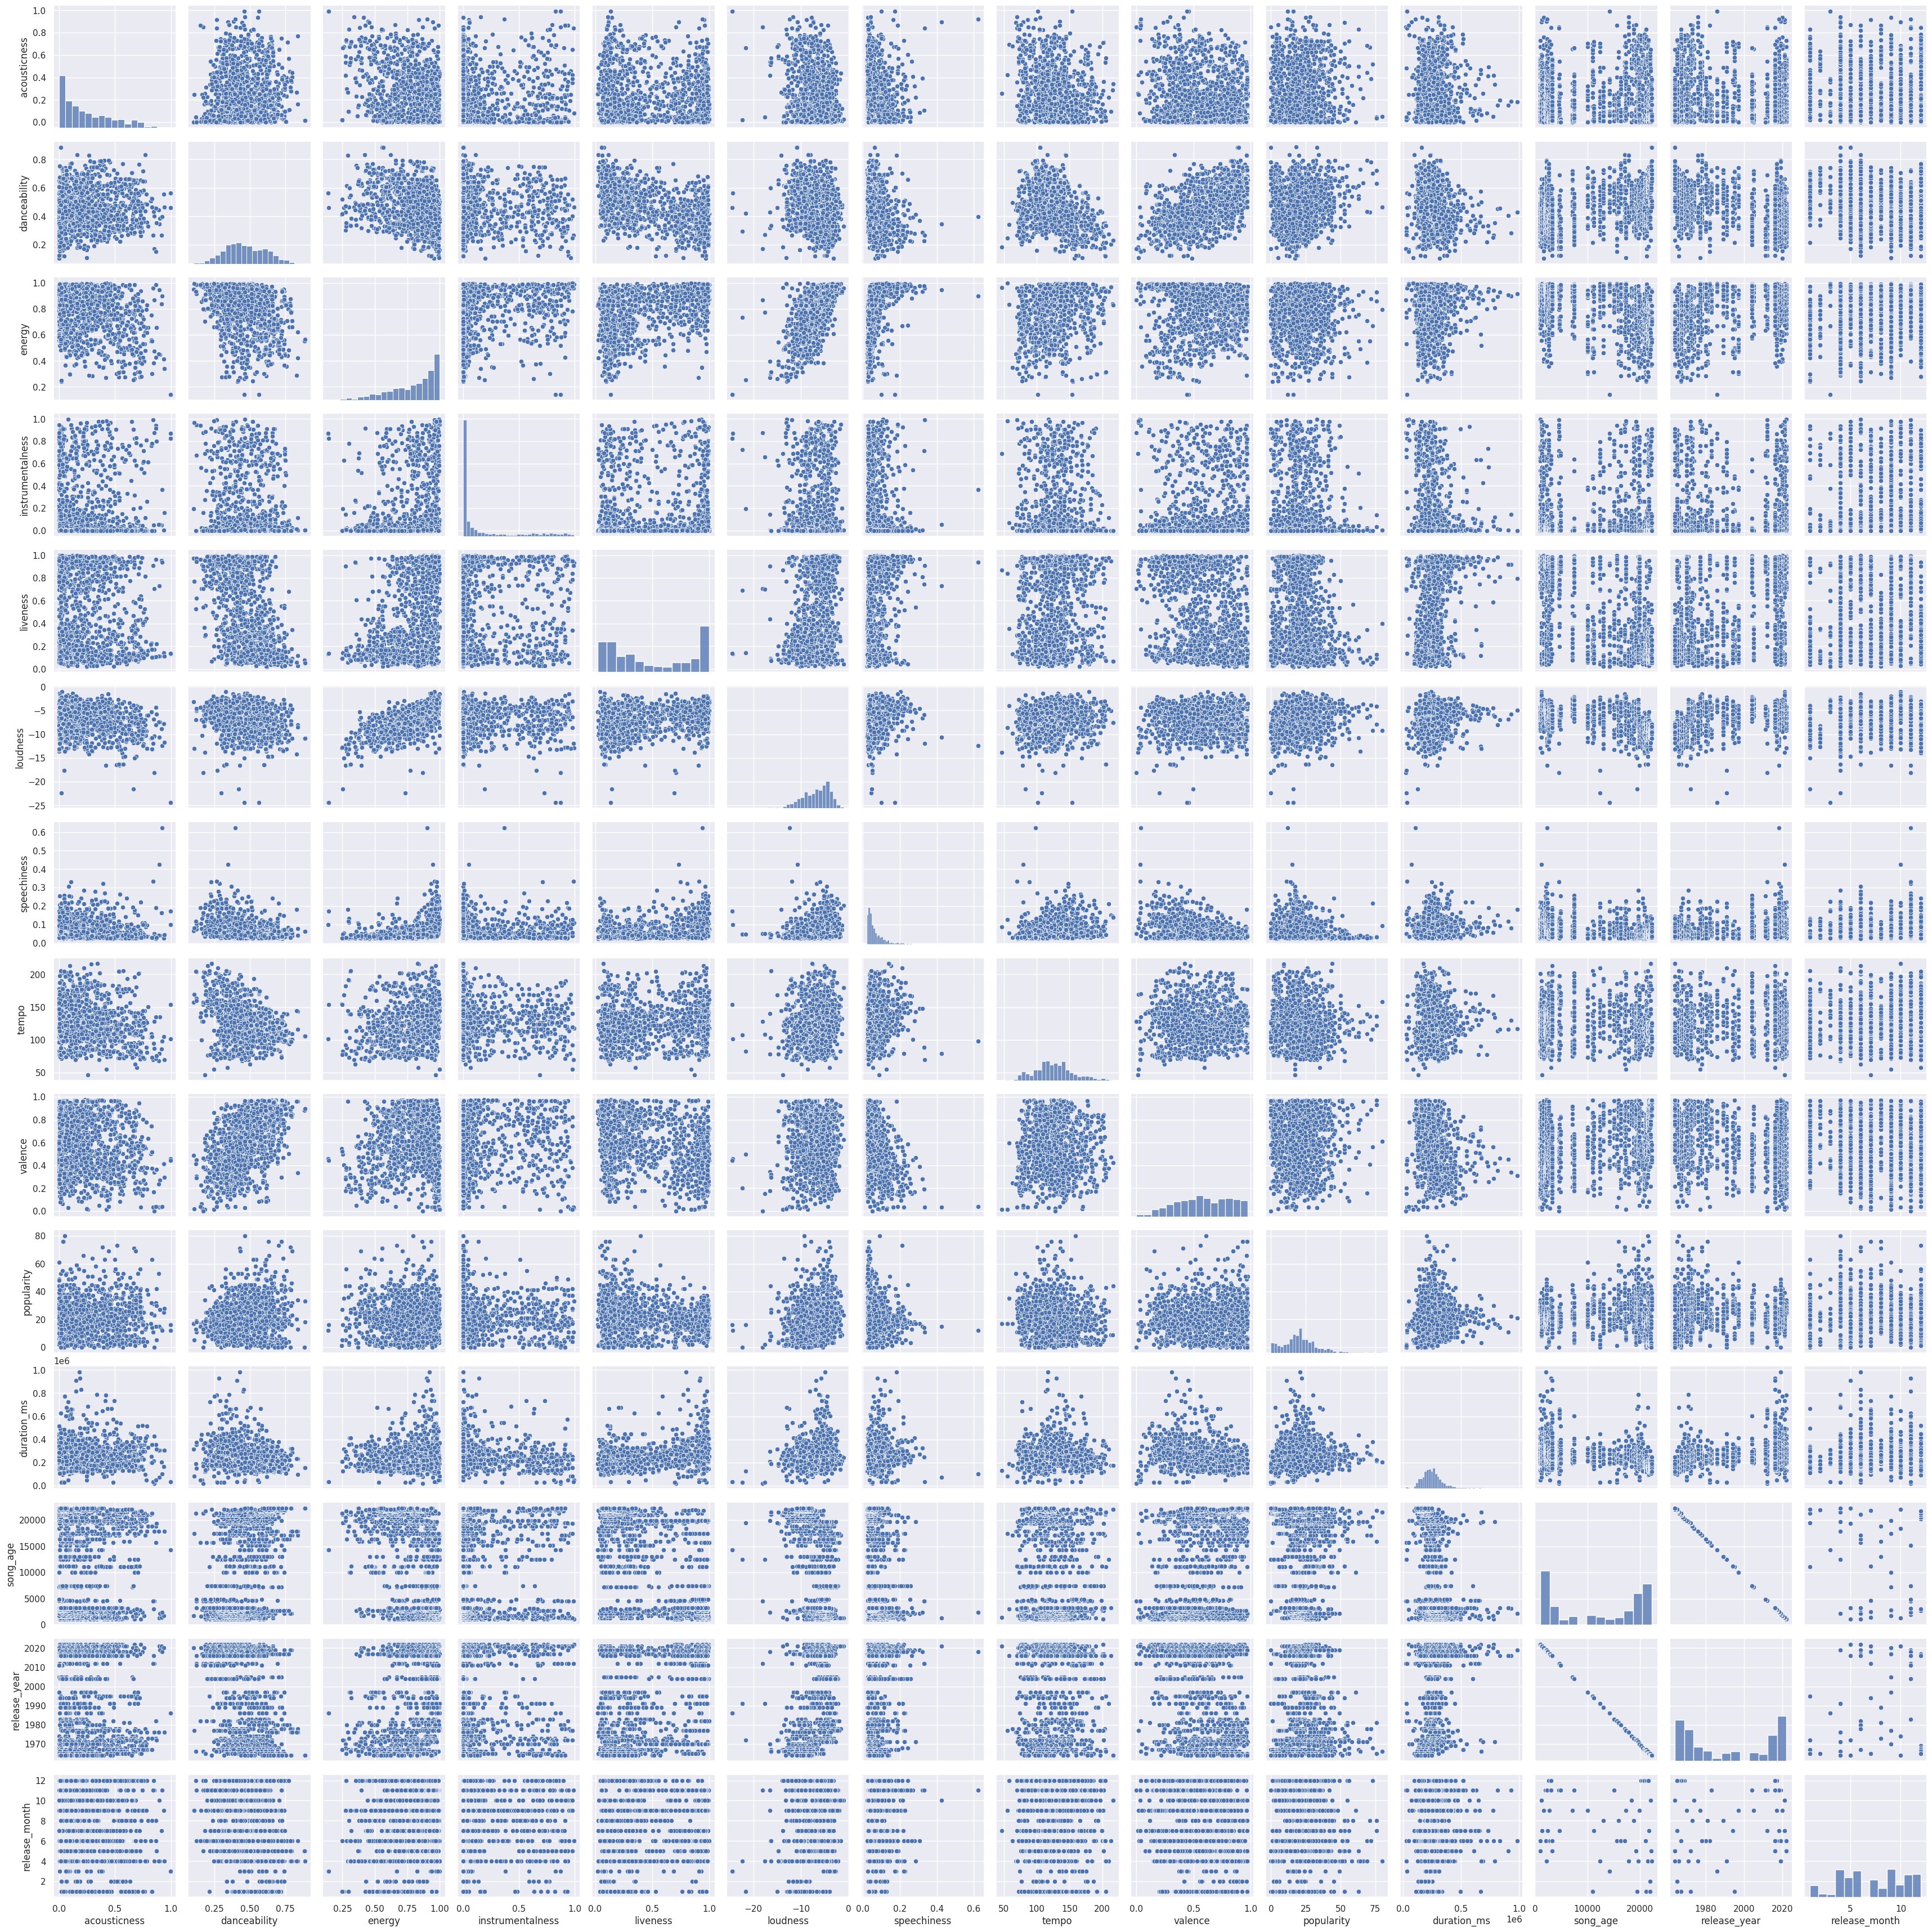

In [12]:
# Extract Comparable features
features = df.drop("track_number", axis=1)
sns.pairplot(features)

### Correlation of Feature with Popularity

#### General Popularity Distribution

<Axes: xlabel='popularity', ylabel='Count'>

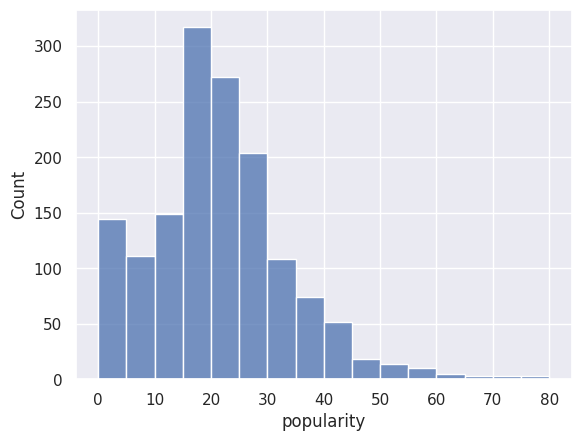

In [13]:
# Review General distribution of popularity score
popularity = df["popularity"]
sns.histplot(popularity, binwidth=5)

#### Keywords with Popularity

In [14]:
# combine and extract keywords from album and song name
import nltk # to download necessary dictionaries 
# nltk.download('punkt')
# nltk.download('punkt_tab')
# nltk.download('stopwords')
# nltk.download('wordnet')

# import stopwords
from nltk.corpus import stopwords
stops = stopwords.words("english")

# import word stemming method
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def filterWords(word):
    return word.isalpha() and word not in stops

def extractKeywords(text):
    tokens = set(filter(filterWords,nltk.word_tokenize(text.lower())))
    tokens = [ stemmer.stem(word) for word in tokens ]
    return tokens

In [15]:
df['tokens'] = (df['name'] + ' ' + df['album']).apply(extractKeywords)
df['tokens']

id
2IEkywLJ4ykbhi1yRQvmsT    [lick, concert, music, intro, live, nyc]
6GVgVJBKkGJoRfarYRvGTU       [lick, live, nyc, man, street, fight]
1Lu761pZ0dBTGpzxaQoZNW                    [lick, live, start, nyc]
1agTQzOTUnGNggyckEqiDH                 [lick, rock, live, ca, nyc]
7piGJR8YndQBQWVXv6KtQw                     [lick, live, stop, nyc]
                                            ...                   
08l7M5UpRnffGl0FyuRiQZ                        [carol, roll, stone]
3JZllQBsTM6WwoJdzFDLhx                         [tell, roll, stone]
0t2qvfSBQ3Y08lzRRoVTdb                     [roll, wit, get, stone]
5ivIs5vwSj0RChOIvlY3On                    [roll, make, tri, stone]
43SkTJJ2xleDaeiE4TIM70                    [walk, dog, roll, stone]
Name: tokens, Length: 1487, dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1487 entries, 2IEkywLJ4ykbhi1yRQvmsT to 43SkTJJ2xleDaeiE4TIM70
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1487 non-null   object 
 1   album             1487 non-null   object 
 2   track_number      1487 non-null   int64  
 3   acousticness      1487 non-null   float64
 4   danceability      1487 non-null   float64
 5   energy            1487 non-null   float64
 6   instrumentalness  1487 non-null   float64
 7   liveness          1487 non-null   float64
 8   loudness          1487 non-null   float64
 9   speechiness       1487 non-null   float64
 10  tempo             1487 non-null   float64
 11  valence           1487 non-null   float64
 12  popularity        1487 non-null   int64  
 13  duration_ms       1487 non-null   int64  
 14  song_age          1487 non-null   int64  
 15  release_year      1487 non-null   int32  
 16  release_

In [17]:
# binarize keywords
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer(sparse_output=True)
token_popularity = pd.DataFrame.sparse.from_spmatrix(
        mlb.fit_transform(df.pop("tokens")),
        index=df.index,
        columns=mlb.classes_).multiply(df["popularity"], axis="index")
token_popularity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1487 entries, 2IEkywLJ4ykbhi1yRQvmsT to 43SkTJJ2xleDaeiE4TIM70
Columns: 672 entries, accept to zero
dtypes: Sparse[int64, 0](672)
memory usage: 11.4+ MB


In [18]:
token_popularity.head()

accept  acoust  aftermath  ago  ai  air  aladdin  \
id                                                                         
2IEkywLJ4ykbhi1yRQvmsT       0       0          0    0   0    0        0   
6GVgVJBKkGJoRfarYRvGTU       0       0          0    0   0    0        0   
1Lu761pZ0dBTGpzxaQoZNW       0       0          0    0   0    0        0   
1agTQzOTUnGNggyckEqiDH       0       0          0    0   0    0        0   
7piGJR8YndQBQWVXv6KtQw       0       0          0    0   0    0        0   

                        almost  alpi  alreadi  ...  worst  wrong  x  ya  yeah  \
id                                             ...                              
2IEkywLJ4ykbhi1yRQvmsT       0     0        0  ...      0      0  0   0     0   
6GVgVJBKkGJoRfarYRvGTU       0     0        0  ...      0      0  0   0     0   
1Lu761pZ0dBTGpzxaQoZNW       0     0        0  ...      0      0  0   0     0   
1agTQzOTUnGNggyckEqiDH       0     0        0  ...      0      0  0   0     0   
7piGJR8YndQBQWVXv6KtQw       0     0        0  ...      0      0  0   0     0   

                        year  yer  yesterday  young  zero  
id                                                         
2IEkywLJ4ykbhi1yRQvmsT     0    0          0      0     0  
6GVgVJBKkGJoRfarYRvGTU     0    0          0      0     0  
1Lu761pZ0dBTGpzxaQoZNW     0    0          0      0     0  
1agTQzOTUnGNggyckEqiDH     0    0          0      0     0  
7piGJR8YndQBQWVXv6KtQw     0    0          0      0     0  

[5 rows x 672 columns]

In [97]:
# sparse statistics
non_zero = lambda x: (x > 0).sum()
non_zero.__name__ = "non-zero"

top_stem = token_popularity.aggregate(func=[
    non_zero,
    "sum",
    "max"
], axis=0)

tmp = top_stem.stack().reset_index()
tmp.columns = ["token","b","c"]
tmp = pd.pivot_table(tmp, index="b", columns="token", values="c")
tmp["mean"] = tmp["sum"] / tmp["non-zero"]
#tmp.sort_values(by=["max","mean"], ascending=[False,False], axis='columns')
tmp

token       max  non-zero    sum       mean
b                                          
accept     13.0       1.0   13.0  13.000000
acoust     50.0       2.0   77.0  38.500000
aftermath  80.0      28.0  636.0  22.714286
ago        42.0       4.0  129.0  32.250000
ai         36.0       3.0   80.0  26.666667
...         ...       ...    ...        ...
year       42.0       9.0  228.0  25.333333
yer        37.0      47.0  910.0  19.361702
yesterday  19.0       6.0   40.0   6.666667
young      15.0       1.0   15.0  15.000000
zero       17.0       2.0   31.0  15.500000

[672 rows x 4 columns]

In [ ]:
token